In [47]:
import imageio
imageio.plugins.ffmpeg.download()
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns",500)

In [2]:
import os
from pliers.extractors import (GoogleVisionAPIFaceExtractor, GoogleVisionAPILabelExtractor)

In [3]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/finnes/Downloads/My-First-Project-899280199fdb.json"

In [4]:
from pliers.stimuli import VideoStim
my_vid = VideoStim('/Users/finnes/Documents/CMI_HBN/the_present_test24sec.mp4')

In [5]:
face_ext = GoogleVisionAPIFaceExtractor()

In [6]:
face_feats = face_ext.transform(my_vid)

Stim: 574it [11:45,  1.02it/s]


In [11]:
dir(face_feats[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_history',
 'data',
 'durations',
 'extractor',
 'features',
 'history',
 'merge_features',
 'merge_stims',
 'onsets',
 'stim',
 'to_df']

In [12]:
feats_df = [f.to_df() for f in face_feats]

In [16]:
feats_df = pd.concat(feats_df)

In [19]:
feats_df.columns

Index(['angerLikelihood', 'blurredLikelihood', 'boundingPoly_vertex1_x',
       'boundingPoly_vertex1_y', 'boundingPoly_vertex2_x',
       'boundingPoly_vertex2_y', 'boundingPoly_vertex3_x',
       'boundingPoly_vertex3_y', 'boundingPoly_vertex4_x',
       'boundingPoly_vertex4_y',
       ...
       'landmark_UPPER_LIP_x', 'landmark_UPPER_LIP_y', 'landmark_UPPER_LIP_z',
       'onset', 'panAngle', 'rollAngle', 'sorrowLikelihood',
       'surpriseLikelihood', 'tiltAngle', 'underExposedLikelihood'],
      dtype='object', length=132)

In [28]:
likert_dict = {'UNLIKELY':-.5, 'POSSIBLE':0, 'VERY_UNLIKELY':-1, 'LIKELY':0.5, 'VERY_LIKELY':1}

NameError: name 'np' is not defined

In [30]:
feats_df.loc[pd.notnull(feats_df.surpriseLikelihood),'surpriseLikelihood'].apply(lambda x:likert_dict[x])

0   -0.5
0   -0.5
0   -0.5
0    0.0
0    0.0
0   -0.5
0   -0.5
0   -0.5
0   -0.5
0   -0.5
0   -0.5
0   -0.5
0   -0.5
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -0.5
0   -0.5
0   -0.5
0   -0.5
0   -0.5
0   -0.5
0   -0.5
0   -0.5
0   -0.5
0   -0.5
0   -0.5
    ... 
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
0   -1.0
Name: surpriseLikelihood, Length: 250, dtype: float64

In [25]:
pd.unique(feats_df.surpriseLikelihood)

array(['UNLIKELY', 'POSSIBLE', 'VERY_UNLIKELY', nan, 'LIKELY',
       'VERY_LIKELY'], dtype=object)

In [33]:
lhoods = [s for s in feats_df.columns if 'Likelihood' in s]

In [34]:
for lh in lhoods:
    feats_df.loc[pd.notnull(feats_df[lh]),lh] = feats_df.loc[pd.notnull(feats_df[lh]),lh].apply(lambda x:likert_dict[x])

In [35]:
feats_df

,angerLikelihood,blurredLikelihood,boundingPoly_vertex1_x,boundingPoly_vertex1_y,boundingPoly_vertex2_x,boundingPoly_vertex2_y,boundingPoly_vertex3_x,boundingPoly_vertex3_y,boundingPoly_vertex4_x,boundingPoly_vertex4_y,duration,face_detectionConfidence,face_landmarkingConfidence,fdBoundingPoly_vertex1_x,fdBoundingPoly_vertex1_y,fdBoundingPoly_vertex2_x,fdBoundingPoly_vertex2_y,fdBoundingPoly_vertex3_x,fdBoundingPoly_vertex3_y,fdBoundingPoly_vertex4_x,fdBoundingPoly_vertex4_y,headwearLikelihood,joyLikelihood,landmark_CHIN_GNATHION_x,landmark_CHIN_GNATHION_y,landmark_CHIN_GNATHION_z,landmark_CHIN_LEFT_GONION_x,landmark_CHIN_LEFT_GONION_y,landmark_CHIN_LEFT_GONION_z,landmark_CHIN_RIGHT_GONION_x,landmark_CHIN_RIGHT_GONION_y,landmark_CHIN_RIGHT_GONION_z,landmark_FOREHEAD_GLABELLA_x,landmark_FOREHEAD_GLABELLA_y,landmark_FOREHEAD_GLABELLA_z,landmark_LEFT_EAR_TRAGION_x,landmark_LEFT_EAR_TRAGION_y,landmark_LEFT_EAR_TRAGION_z,landmark_LEFT_EYEBROW_UPPER_MIDPOINT_x,landmark_LEFT_EYEBROW_UPPER_MIDPOINT_y,landmark_LEFT_EYEBROW_UPPER_MIDPOINT_z,landmark_LEFT_EYE_BOTTOM_BOUNDARY_x,landmark_LEFT_EYE_BOTTOM_BOUNDARY_y,landmark_LEFT_EYE_BOTTOM_BOUNDARY_z,landmark_LEFT_EYE_LEFT_CORNER_x,landmark_LEFT_EYE_LEFT_CORNER_y,landmark_LEFT_EYE_LEFT_CORNER_z,landmark_LEFT_EYE_PUPIL_x,landmark_LEFT_EYE_PUPIL_y,landmark_LEFT_EYE_PUPIL_z,landmark_LEFT_EYE_RIGHT_CORNER_x,landmark_LEFT_EYE_RIGHT_CORNER_y,landmark_LEFT_EYE_RIGHT_CORNER_z,landmark_LEFT_EYE_TOP_BOUNDARY_x,landmark_LEFT_EYE_TOP_BOUNDARY_y,landmark_LEFT_EYE_TOP_BOUNDARY_z,landmark_LEFT_EYE_x,landmark_LEFT_EYE_y,landmark_LEFT_EYE_z,landmark_LEFT_OF_LEFT_EYEBROW_x,landmark_LEFT_OF_LEFT_EYEBROW_y,landmark_LEFT_OF_LEFT_EYEBROW_z,landmark_LEFT_OF_RIGHT_EYEBROW_x,landmark_LEFT_OF_RIGHT_EYEBROW_y,landmark_LEFT_OF_RIGHT_EYEBROW_z,landmark_LOWER_LIP_x,landmark_LOWER_LIP_y,landmark_LOWER_LIP_z,landmark_MIDPOINT_BETWEEN_EYES_x,landmark_MIDPOINT_BETWEEN_EYES_y,landmark_MIDPOINT_BETWEEN_EYES_z,landmark_MOUTH_CENTER_x,landmark_MOUTH_CENTER_y,landmark_MOUTH_CENTER_z,landmark_MOUTH_LEFT_x,landmark_MOUTH_LEFT_y,landmark_MOUTH_LEFT_z,landmark_MOUTH_RIGHT_x,landmark_MOUTH_RIGHT_y,landmark_MOUTH_RIGHT_z,landmark_NOSE_BOTTOM_CENTER_x,landmark_NOSE_BOTTOM_CENTER_y,landmark_NOSE_BOTTOM_CENTER_z,landmark_NOSE_BOTTOM_LEFT_x,landmark_NOSE_BOTTOM_LEFT_y,landmark_NOSE_BOTTOM_LEFT_z,landmark_NOSE_BOTTOM_RIGHT_x,landmark_NOSE_BOTTOM_RIGHT_y,landmark_NOSE_BOTTOM_RIGHT_z,landmark_NOSE_TIP_x,landmark_NOSE_TIP_y,landmark_NOSE_TIP_z,landmark_RIGHT_EAR_TRAGION_x,landmark_RIGHT_EAR_TRAGION_y,landmark_RIGHT_EAR_TRAGION_z,landmark_RIGHT_EYEBROW_UPPER_MIDPOINT_x,landmark_RIGHT_EYEBROW_UPPER_MIDPOINT_y,landmark_RIGHT_EYEBROW_UPPER_MIDPOINT_z,landmark_RIGHT_EYE_BOTTOM_BOUNDARY_x,landmark_RIGHT_EYE_BOTTOM_BOUNDARY_y,landmark_RIGHT_EYE_BOTTOM_BOUNDARY_z,landmark_RIGHT_EYE_LEFT_CORNER_x,landmark_RIGHT_EYE_LEFT_CORNER_y,landmark_RIGHT_EYE_LEFT_CORNER_z,landmark_RIGHT_EYE_PUPIL_x,landmark_RIGHT_EYE_PUPIL_y,landmark_RIGHT_EYE_PUPIL_z,landmark_RIGHT_EYE_RIGHT_CORNER_x,landmark_RIGHT_EYE_RIGHT_CORNER_y,landmark_RIGHT_EYE_RIGHT_CORNER_z,landmark_RIGHT_EYE_TOP_BOUNDARY_x,landmark_RIGHT_EYE_TOP_BOUNDARY_y,landmark_RIGHT_EYE_TOP_BOUNDARY_z,landmark_RIGHT_EYE_x,landmark_RIGHT_EYE_y,landmark_RIGHT_EYE_z,landmark_RIGHT_OF_LEFT_EYEBROW_x,landmark_RIGHT_OF_LEFT_EYEBROW_y,landmark_RIGHT_OF_LEFT_EYEBROW_z,landmark_RIGHT_OF_RIGHT_EYEBROW_x,landmark_RIGHT_OF_RIGHT_EYEBROW_y,landmark_RIGHT_OF_RIGHT_EYEBROW_z,landmark_UPPER_LIP_x,landmark_UPPER_LIP_y,landmark_UPPER_LIP_z,onset,panAngle,rollAngle,sorrowLikelihood,surpriseLikelihood,tiltAngle,underExposedLikelihood
0,-1,-1,506.0,9.0,932.0,9.0,932.0,503.0,506.0,503.0,0.041667,0.761263,0.466126,557.0,208.0,824.0,208.0,824.0,474.0,557.0,474.0,-1,-1,704.91410,487.93768,97.459990,582.98724,364.78967,168.339950,847.49570,382.31600,153.706090,710.07904,281.73282,-45.217380,575.88165,265.79764,175.00389,641.91010,257.52478,-35.122448,652.10034,301.76130,3.735719,622.59630,285.01782,12.292263,644.66986,293.21292,-1.973184

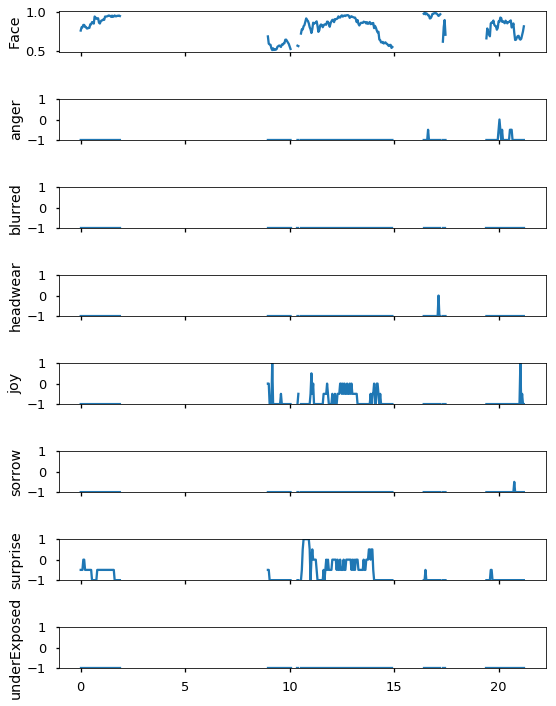

In [52]:
sns.set_context('talk')
fig, axs = plt.subplots(8,1, figsize = (8,10), sharex = True)
axs[0].plot(feats_df.onset, feats_df.face_detectionConfidence)
axs[0].set_ylabel('Face')
for i,lh in enumerate(lhoods):
    axs[i+1].plot(feats_df.onset, feats_df[lh], label = lh)
    axs[i+1].set_ylabel(lh[:-10])
    axs[i+1].set_ylim(-1,1)
fig.tight_layout()

In [54]:
!mkdir /Users/finnes/Documents/CMI_HBN/feature_extraction

In [55]:
feats_df.to_csv('/Users/finnes/Documents/CMI_HBN/feature_extraction/test24sec.csv', index = False)

In [ ]:
feats_df.